In [1]:
import os
import pandas as pd
import geopandas as gpd
%matplotlib notebook
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
os.getcwd()

'C:\\Users\\Shino Bear\\Desktop\\GIS Project Files'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'COD_MiningZones_2017.cpg',
 'COD_MiningZones_2017.dbf',
 'COD_MiningZones_2017.prj',
 'COD_MiningZones_2017.qpj',
 'COD_MiningZones_2017.shp',
 'COD_MiningZones_2017.shx',
 'cod_mining_zones_2017',
 'cod_mining_zones_2017.zip',
 'congo_map.png',
 'congo_mines.png',
 'Data Merge - OW-F2019.ipynb',
 'deaths.png',
 'gadm36_COD_0.cpg',
 'gadm36_COD_0.dbf',
 'gadm36_COD_0.prj',
 'gadm36_COD_0.shp',
 'gadm36_COD_0.shx',
 'gadm36_COD_1.cpg',
 'gadm36_COD_1.dbf',
 'gadm36_COD_1.prj',
 'gadm36_COD_1.shp',
 'gadm36_COD_1.shx',
 'gadm36_COD_2.cpg',
 'gadm36_COD_2.dbf',
 'gadm36_COD_2.prj',
 'gadm36_COD_2.shp',
 'gadm36_COD_2.shx',
 'gadm36_COD_shp',
 'gadm36_COD_shp.zip',
 'gedevents_2019_10_17.csv',
 'GIS Project.ipynb',
 'MINES.png',
 'Spacial Stats for Congo - OW-F2019.ipynb']

Going to be using "gedevents_2019_10_17.csv", "gadm36_COD_1.shp", and "COD_MiningZones_2017.shp". Provided files.

In [6]:
deaths = pd.read_csv('gedevents_2019_10_17.csv', encoding='latin-1')

In [7]:
cross_98 = deaths.loc[deaths['year'] == 1998]

In [8]:
cross_98.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best_est,high_est,low_est
14,20199,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,585,585,Government of DR Congo (Zaire) - MLC,89,89,Government of DR Congo (Zaire),423,423,MLC,-1,"Agence France Presse dispatch, Kisangani, 13 N...",NaN,NaN,NaN,Red Cross,1,Dulia location,NaN,Orientale province,Aketi territory,2.950000,24.133333,POINT (24.133333 2.950000),133609,DR Congo (Zaire),490,Africa,1,1,11/29/1998 0:00,11/29/1998 0:00,122,0,0,0,122,150,122
18,20205,NaN,1998,True,Clear,3,548,548,RCD - Civilians,1015,1015,RCD - Civilians,424,424,RCD,1,1,Civilians,-1,http://www.congoned.dds.nl/chroni28.html,NaN,NaN,NaN,MISNA,1,Kalungu location,NaN,Sud Kivu province,Kalehe territory,-1.750000,29.010000,POINT (29.010000 -1.750000),127139,DR Congo (Zaire),490,Africa,1,1,12/15/1998 0:00,12/15/1998 0:00,0,0,8,0,8,8,8
20,20207,NaN,1998,True,Clear,3,467,467,Government of DR Congo (Zaire) - Civilians,934,934,Government of DR Congo (Zaire) - Civilians,89,89,Government of DR Congo (Zaire),1,1,Civilians,-1,A/53/365,NaN,NaN,NaN,NaN,1,Kimbanseke location,NaN,Kinshasa city region,Tshangu zone,-4.426111,15.374444,POINT (15.374444 -4.426111),123511,DR Congo (Zaire),490,Africa,1,1,2/9/1998 0:00,2/9/1998 0:00,0,0,2,0,2,2,2
21,20209,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,586,586,Government of DR Congo (Zaire) - RCD,89,89,Government of DR Congo (Zaire),424,424,RCD,-1,mewpan0020010925du83001d7,NaN,NaN,NaN,NaN,1,Kinshasa city,NaN,Kinshasa city province,NaN,-4.329722,15.315000,POINT (15.315000 -4.329722),123511,DR Congo (Zaire),490,Africa,1,1,8/3/1998 0:00,8/3/1998 0:00,20,0,10,0,30,30,30
32,20266,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,586,586,Government of DR Congo (Zaire) - RCD,89,89,Government of DR Congo (Zaire),424,424,RCD,-1,"FOCUS - Congo rebels attack Kinshasa, army hit...",NaN,NaN,NaN,Residents in the suburb of Masina,1,Kinshasa city,NaN,Kinshasa city province,NaN,-4.329722,15.315000,POINT (15.315000 -4.329722),123511,DR Congo (Zaire),490,Africa,1,1,8/26/1998 0:00,8/26/1998 0:00,3,0,0,0,3,3,3


In [9]:
cross_98.conflict_name.head()

14                  DR Congo (Zaire): Government
18                               RCD - Civilians
20    Government of DR Congo (Zaire) - Civilians
21                  DR Congo (Zaire): Government
32                  DR Congo (Zaire): Government
Name: conflict_name, dtype: object

In [10]:
keep_cols = ['year', 'where_coordinates', 'geom_wkt', 'side_a', 'side_b', 'deaths_a', 'deaths_b', 
             'deaths_civilians', 'deaths_unknown', 'best_est']

In [13]:
small_98 = cross_98[keep_cols]

In [14]:
small_98.head()

,year,where_coordinates,geom_wkt,side_a,side_b,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best_est
14,1998,Dulia location,POINT (24.133333 2.950000),Government of DR Congo (Zaire),MLC,122,0,0,0,122
18,1998,Kalungu location,POINT (29.010000 -1.750000),RCD,Civilians,0,0,8,0,8
20,1998,Kimbanseke location,POINT (15.374444 -4.426111),Government of DR Congo (Zaire),Civilians,0,0,2,0,2
21,1998,Kinshasa city,POINT (15.315000 -4.329722),Government of DR Congo (Zaire),RCD,20,0,10,0,30
32,1998,Kinshasa city,POINT (15.315000 -4.329722),Government of DR Congo (Zaire),RCD,3,0,0,0,3


In [15]:
small_98.deaths_unknown.describe()

count    118.000000
mean       8.949153
std       86.724226
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      942.000000
Name: deaths_unknown, dtype: float64

In [16]:
congo = gpd.read_file('gadm36_COD_1.shp')

mines = gpd.read_file('COD_MiningZones_2017.shp')

In [17]:
congo.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,COD,Democratic Republic of the Congo,COD.1_1,Bas-UÃ©lÃ©,None,None,Province,Province,None,CD.BU,"POLYGON ((25.89406586 2.25547981, 25.8799839 2..."
1,COD,Democratic Republic of the Congo,COD.2_1,Ãquateur,None,None,Province,Province,None,CD.ET,"POLYGON ((17.50642586 -1.4798044, 17.48075485 ..."
2,COD,Democratic Republic of the Congo,COD.3_1,Haut-Katanga,None,None,Province,Province,None,CD.HK,"POLYGON ((28.50965691 -11.8835268, 28.52198982..."
3,COD,Democratic Republic of the Congo,COD.4_1,Haut-Lomami,None,None,Province,Province,None,CD.HL,"POLYGON ((26.75311661 -8.66946888, 26.75753593..."
4,COD,Democratic Republic of the Congo,COD.5_1,Haut-UÃ©lÃ©,None,None,Province,Province,None,CD.HU,"POLYGON ((28.32213211 2.33520317, 28.3213768 2..."


In [18]:
mines.head()

,Name,descriptio,tessellate,extrude,visibility,Demand 16,SNEL 16,OTHER 2016,GAP 2016,Demand 30,SNEL 30,OTHER 30,GAP 30,geometry
0,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.2250000003564 -10.8333333003332...
1,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.0583333001425 -10.9083333002918...
2,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.233333300243 -10.8333333003332 ...
3,AMB KASAI Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((20.5833333001417 -6.10833329994012...
4,AMB KASAI Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((20.5916666997412 -6.20833329995253...


<IPython.core.display.Javascript object>


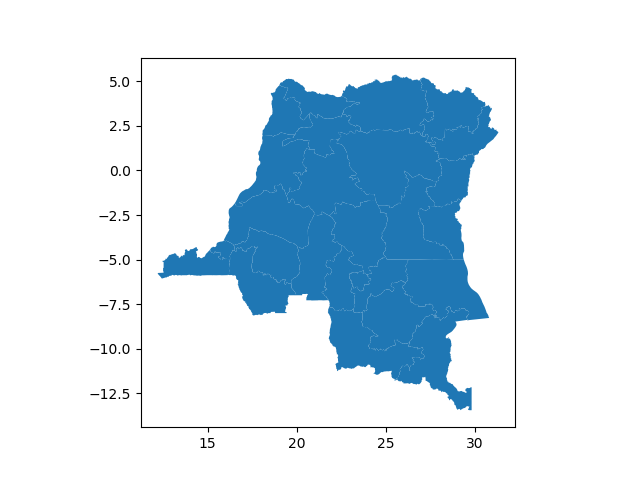

<IPython.core.display.Javascript object>


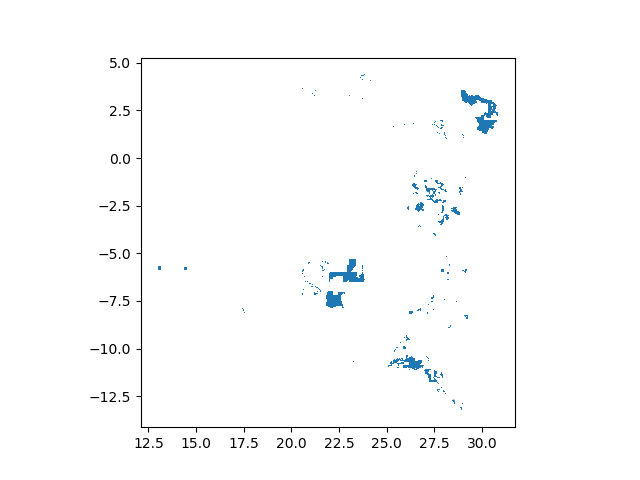

In [19]:
congo.plot()

mines.plot()

<IPython.core.display.Javascript object>


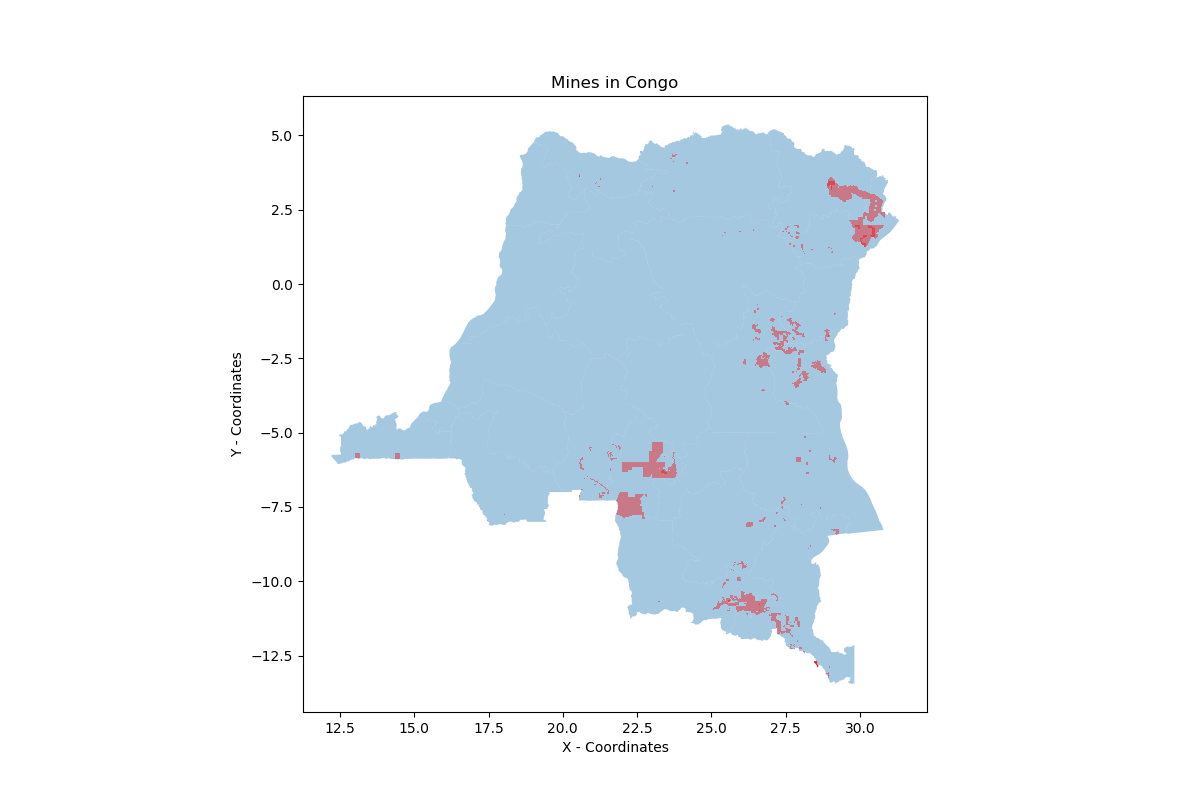

Text(0.5, 1.0, 'Mines in Congo')

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 8))
congo.plot(ax=ax, alpha=0.4)
mines.plot(ax=ax, color='red', alpha=0.4)
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Mines in Congo")

In [21]:
cross_98_point = [Point(xy) for xy in zip(cross_98.longitude, cross_98.latitude)]

In [22]:
cross_98_gdf = gpd.GeoDataFrame(cross_98, geometry = cross_98_point)

<IPython.core.display.Javascript object>


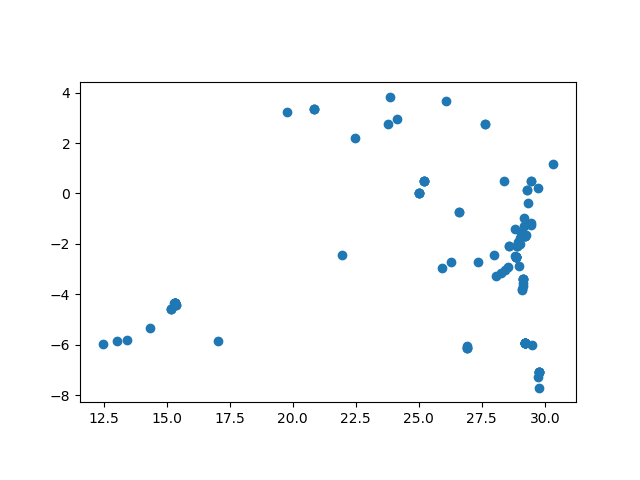

In [24]:
cross_98_gdf.plot()

In [25]:
from fiona.crs import from_epsg
cross_98_gdf.crs = from_epsg(4326)

<IPython.core.display.Javascript object>


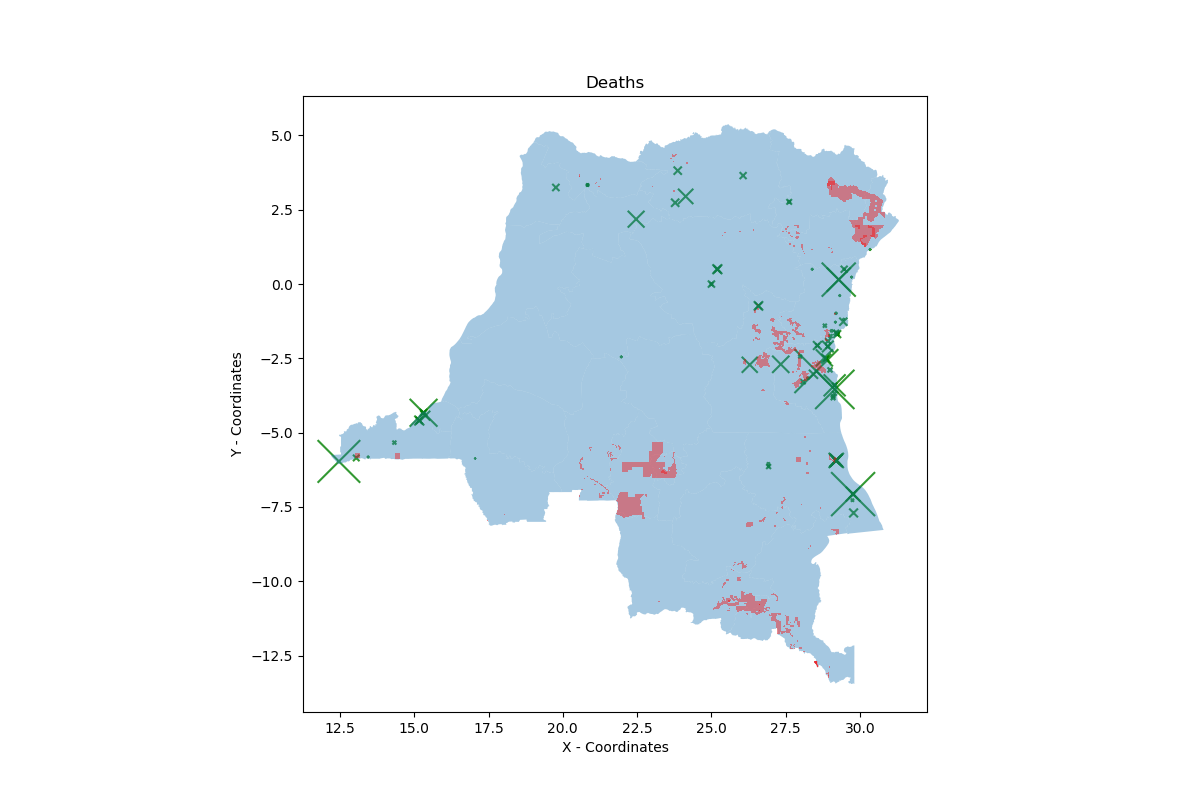

Text(0.5, 1.0, 'Deaths')

In [26]:
fig, ax = plt.subplots(1, figsize=(12, 8))
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['best_est'], color='green',alpha=.8)
congo.plot(ax=ax, alpha=0.4)
mines.plot(ax=ax, color='red', alpha=0.4)
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Deaths")

<IPython.core.display.Javascript object>


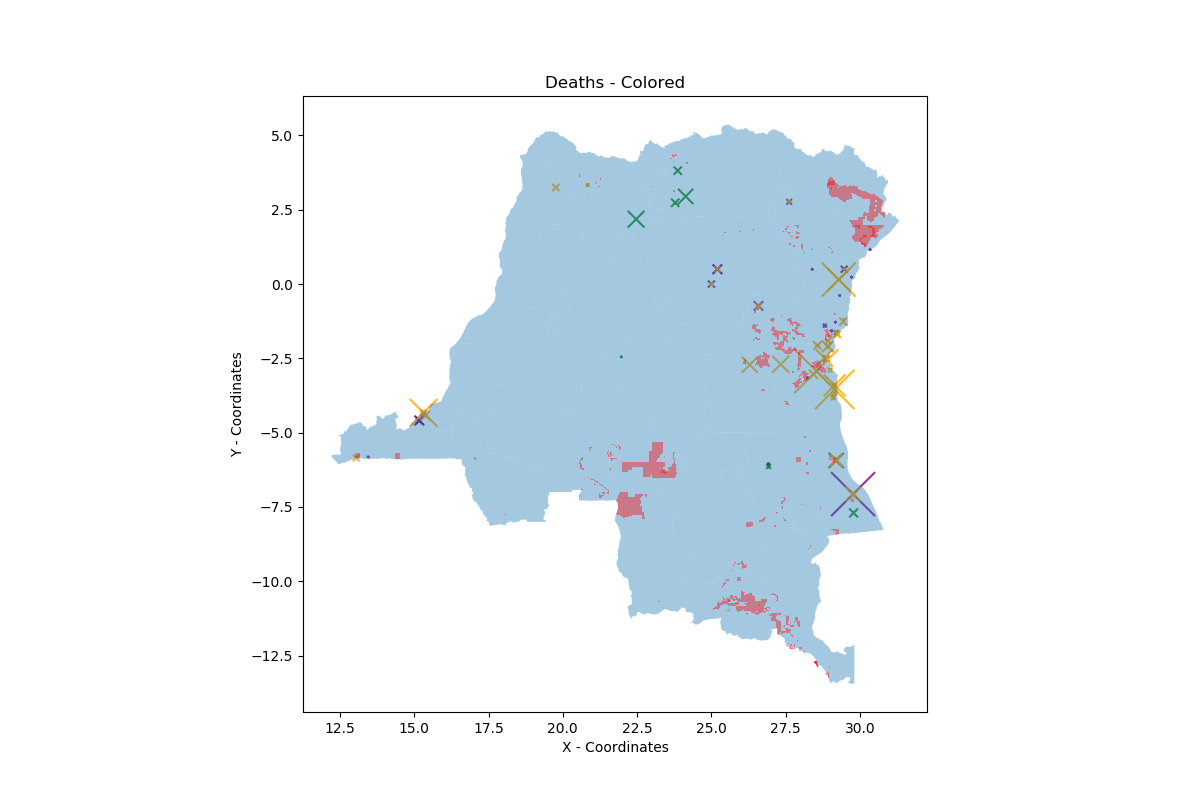

Text(0.5, 1.0, 'Deaths - Colored')

In [27]:
fig, ax = plt.subplots(1, figsize=(12, 8))
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['deaths_a'], color='green',alpha=.8)
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['deaths_b'], color='purple',alpha=.8)
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['deaths_civilians'], color='orange',alpha=.8)
congo.plot(ax=ax, alpha=0.4)
mines.plot(ax=ax, color='red', alpha=0.4)
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Deaths - Colored")